Best Variables:
Var1: 6.3666200773040185
Var2: 1000.0142919185057
Var3: 499.99787975725144


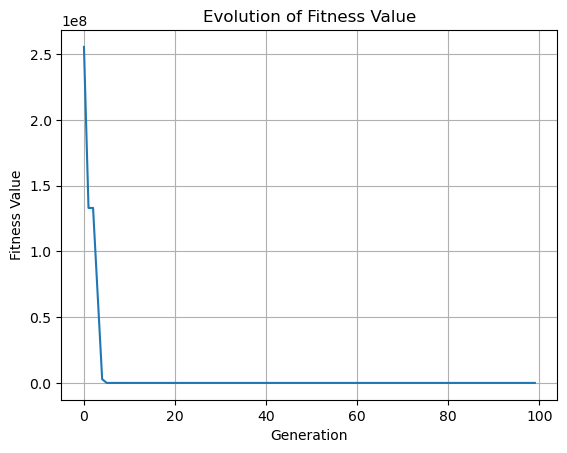

In [7]:
import random
import math
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Define the range for each variable
var1_range = (0, 10000)   ###Weight for Waittime
var2_range = (0, 10000)   ##Weight for Fairshare
var3_range = (0, 10000)   ##Weight for Job Size
# Define the number of variables
num_vars = 3

# Define the optimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, a=0, b=10000)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float, toolbox.attr_float, toolbox.attr_float),
                 n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=100, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Define parameters
pop_size = 50
num_generations = 100

# Create initial population
population = toolbox.population(n=pop_size)

# Define the fitness function
def evaluate_individual(individual):
    var1, var2, var3 = individual
    
    # Define the fitness function (Euclidean distance from target values)
    target_var1 = 300
    target_var2 = 1000
    target_var3 = 500
    distance = math.sqrt((var1**2 + var1**3 - target_var1)**2 + (var2 - target_var2)**2 + (var3 - target_var3)**2)
    
    return distance,

toolbox.register("evaluate", evaluate_individual)

# Create lists to store the evolution of fitness values
gen = []
fit_values = []

# Perform optimization
for gen_num in range(num_generations):
    # Evaluate the fitness of the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    # Select the next generation individuals
    offspring = toolbox.select(population, len(population))

    # Clone the selected individuals
    offspring = list(map(toolbox.clone, offspring))

    # Apply crossover and mutation on the offspring
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Replace the population by the offspring
    population[:] = offspring

    # Append the generation number and the best fitness value to the lists
    gen.append(gen_num)
    best_fitness = min([ind.fitness.values[0] for ind in population])
    fit_values.append(best_fitness)

# Retrieve the best individual
best_individual = tools.selBest(population, k=1)[0]
best_var1, best_var2, best_var3 = best_individual

print("Best Variables:")
print("Var1:", best_var1)
print("Var2:", best_var2)
print("Var3:", best_var3)

# Plot the evolution of fitness value with respect to generation
plt.plot(gen, fit_values)
plt.xlabel('Generation')
plt.ylabel('Fitness Value')
plt.title('Evolution of Fitness Value')
plt.grid(True)
plt.show()
